$$ \bf{EE0404\ SIGNAL\ PROCESSING\ APPLICATIONS} $$
$$ \ $$
$$ $$
$$ \text{Lecture 8} $$

$$ \text{Effects of zeroes and poles on Frequeuncy Response}
 $$

$$ \text{ By: Güray GÜRKAN, PhD} $$

$$ Aug\ 2016 $$

# Effects of zeroes and poles on Frequency Response

**1.)** Effect of zeroes on frequency response

- Finite Impulse Response (FIR) Filters 

**2.)**  Effect of poles on frequency response

- Infinite Impulse Response (IIR) Filters 


# Filtering is...

Filtering usually implies modification of frequency content of an input signal.


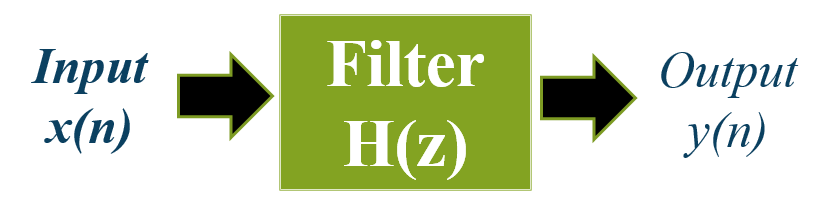

In [1]:
from IPython.display import Image
Image('.\Figs\EE0404_Lecture8_fig1.png',width=400)

# Frequency Content Modification: Ideal Descriptions

- Omit frequencies higher than a specific frequency: **Low-pass filtering**


- Omit frequencies lower than a specific frequency: **High-pass filtering**


- Omit frequencies that are out of a specific band: ** Band-pass filtering **


- Omit frequencies that are in a specific band: ** Band-reject filtering ** 


# Effect of Zeroes on frequency response

## Example: Simplest Filter via zeroes

We want a filter that will have a zero gain at 400 Hz. Calculate transfer function if $f_s$= 2kHz.

What is your suggestion?

** *Solution* **

- We need only one zero at 400 Hz, one root at numerator.

- The normalized angular frequency of zero point is
 $$ \Omega = 2\pi \frac{400} {f_s} = 0.4\pi $$

- The location of zero on unit circle is:

$$ e^{j\Omega} = e^{j\ 0.4\pi} $$

- and on z-plane

$$ z = 1.e^{j\ 0.4\pi}=e^{j\ 0.4\pi} $$


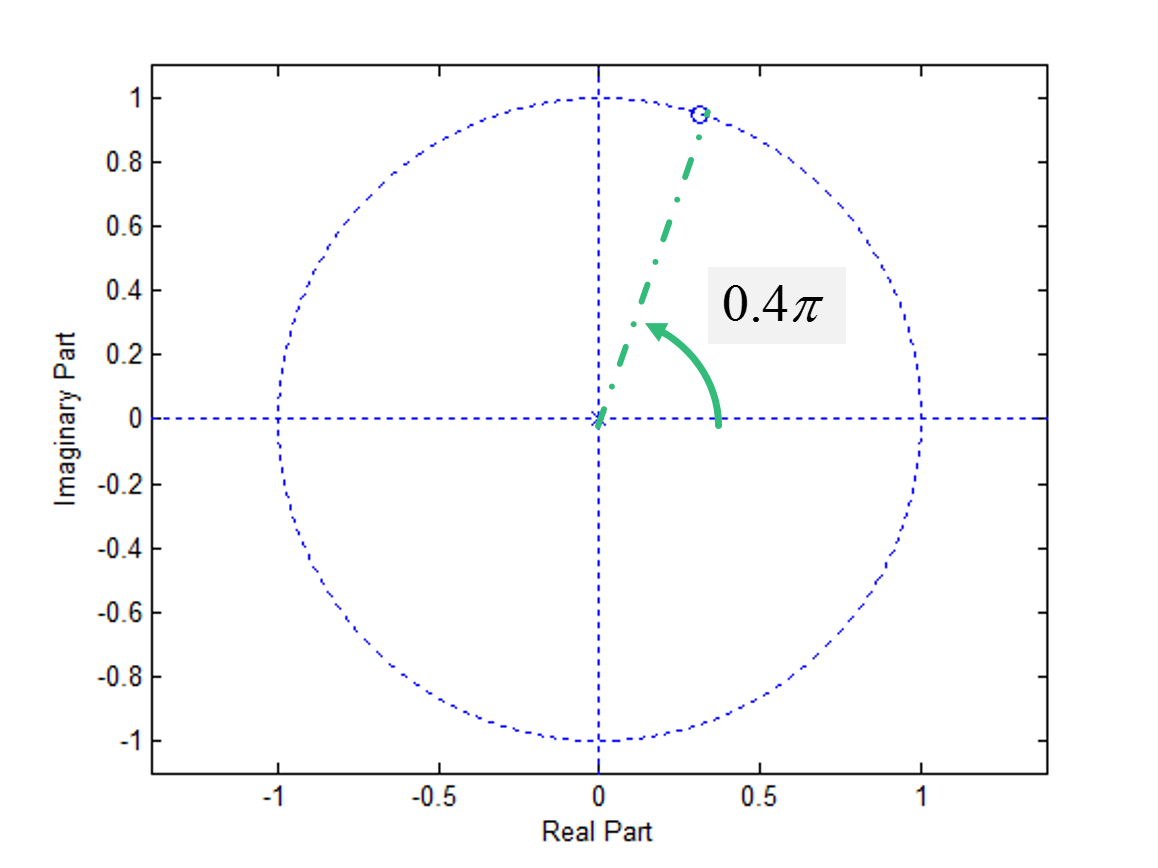

In [2]:
Image('.\Figs\EE0404_Lecture8_fig2.png',width=400)

 ** *Frequency Response* ** 
 
 So for the single zero, we have
 
 $$ H(z) = z - e^{j0.4\pi} $$
 
 since
 
 $$ H(z) |_{z\ = \ e\ ^{j0.4\pi}} = e^{j0.4\pi}- e^{j0.4\pi} = 0 $$ 

So this filter has a zero gain for $0.4 \pi$ . What about other frequencies?

Populating the interactive namespace from numpy and matplotlib


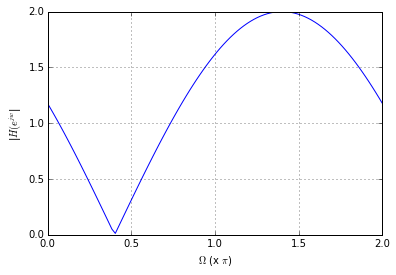

In [3]:
%pylab inline

# Frequency Response: Single zero at 0.4 pi

w = linspace(0,2*pi,100)
H = exp(1j*w)-exp(1j*0.4*pi)

plot(w/pi, abs(H))
xlabel('$\Omega$ (x $\pi$)')
ylabel('|$H(e^{jw}$|')
grid(True)

** Realizable? **

Consider this single-zero filter

 $$ H(z) = z - e^{j0.4\pi} $$
 
- Does it have real coefficients?

- Is it casual?

** *Solution* **

- The difference equation of the filter is 

$$ y(n) = x(n+1) - e^{j0.4\pi}x(n) $$

which has a complex coefficient and is non-causal.

** 1) Getting rid of non-causality **

From the difference equation

$$ Y(z) = X(z)z - e^{j0.4\pi}X(z) $$

- By multiplying both sides of the equation by $z^{-1}$, we obtain 

$$ Y(z)z^{-1} = X(z) - e^{j0.4\pi}X(z)z^{-1} $$

Reverting back to difference equation yields,

$$ y(n-1) = x(n) - e^{j0.4\pi}x(n-1) $$

Thus, by introducing a single delay element, that is, by a single delay in samples, the causality is satisfied. For this form,

$$ H(z) = \frac{1-e^{j0.4\pi}z^{-1}} {z^{-1}} $$

** 2) Getting rid of complex coefficient **

- How can it be transformed such that all coefficients are real and the frequency response stays untouched?


- Remember that real world signals cosine and sine have two components in Fourier Domain.


- So, in addition to $0.4\pi$, we may add a $2^{nd}$ zero that is symmetrical to the $x$-axis: $ -0.4\pi$

$$ H(z) = \left( \frac{1-e\ ^{j0.4\pi}z^{-1}} {z^{-1}} \right) \left( \frac{1-e^{-j0.4\pi}z^{-1}} {z^{-1}} \right) $$

$$H(z) = \frac {1 - 2 cos(0.4\pi)z^{-1} + z^{-2} } {z^{-2}} $$

This filter has conjugate symmetric zeroes at $\mp 0.4 \pi$, causal and has real coefficients.

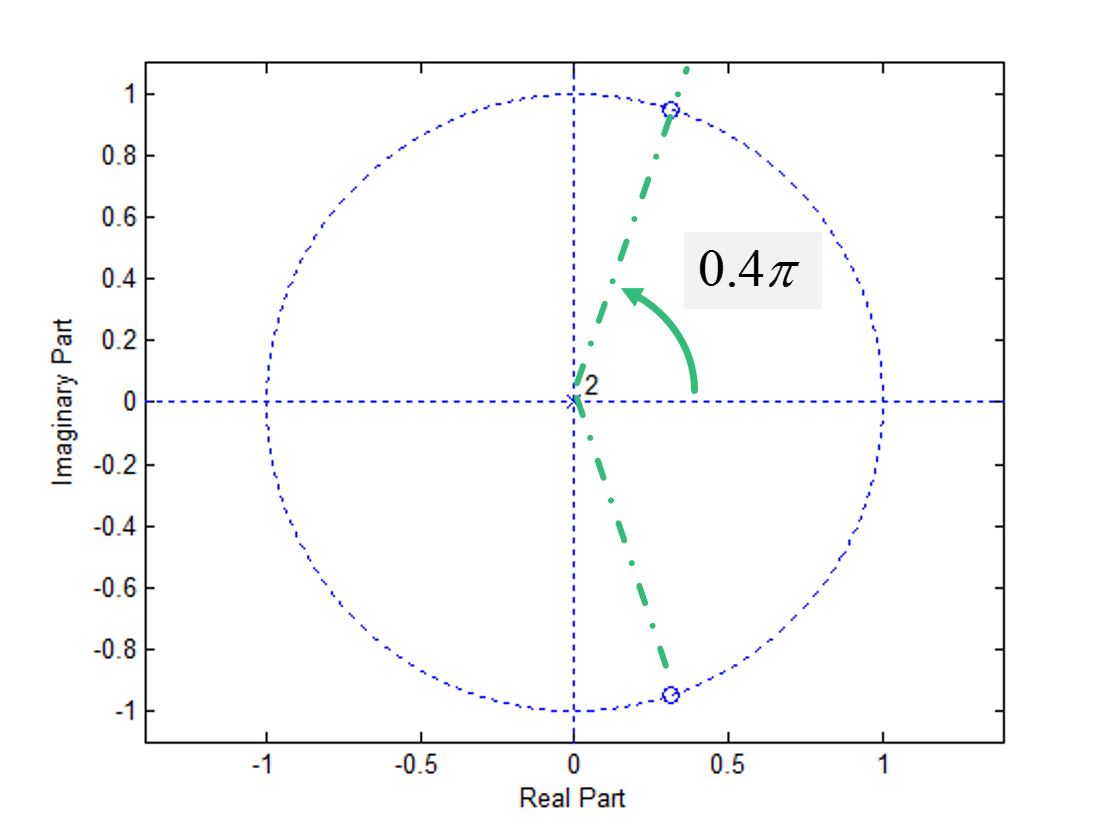

In [4]:
Image('.\Figs\EE0404_Lecture8_fig3.png',width=300)

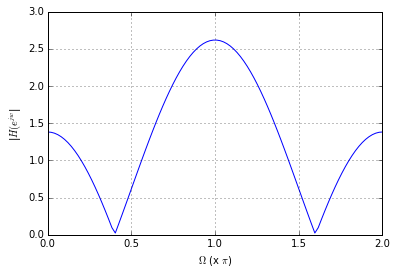

In [5]:
# Frequency Response: Complex Conjugate zeroes at 0.4 pi

w = linspace(0,2*pi,100)
H2 = (1 - 2*cos(0.4*pi)*exp(-1j*w) + exp(- 1j*2*w)) / exp(- 1j*2*w)

plot(w/pi, abs(H2))
xlabel('$\Omega$ (x $\pi$)')
ylabel('|$H(e^{jw}$|')
grid(True)

As the frequency response reveal, the filter has zero gains for $\mp 0.4 \pi $

*- Note that this plot is sliced from unit circle located in 3 dimensional z-plane. (Will be visited later)* 

The final form of the filter has a difference equation

$$ y(n-2) = x(n) - 2 cos(0.4\pi) x(n-1) + x(n-2) $$

Thus, the output is obtained after 2 samples from the first input sample. 

** Impulse response **

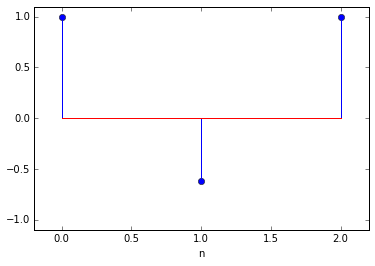

In [6]:
h = [1, -2*cos(0.4*pi), 1]
n = [0,1,2]

stem(n,h)
xlim([-.2, 2.2])
ylim([-1.1, 1.1])
xlabel('n')

- ** *Addition of a third zero at $\pi$* **

If a third zero is desired at $\Omega = \pi $, the additional multiplier is

$$ \hat H = \left( \frac {1-e^{\ j\pi} z^{-1}}{z^{-1}} \right)= \left( \frac {1 + z^{-1}}{z^{-1}} \right)$$ 

since $ e^{\ j\pi} = -1 $. Thus, 

$$H(z) = \left( \frac {1 - 2 cos(0.4\pi)z^{-1} + z^{-2} } {z^{-2}} \right)  \left( \frac {1 + z^{-1}}{z^{-1}} \right) $$


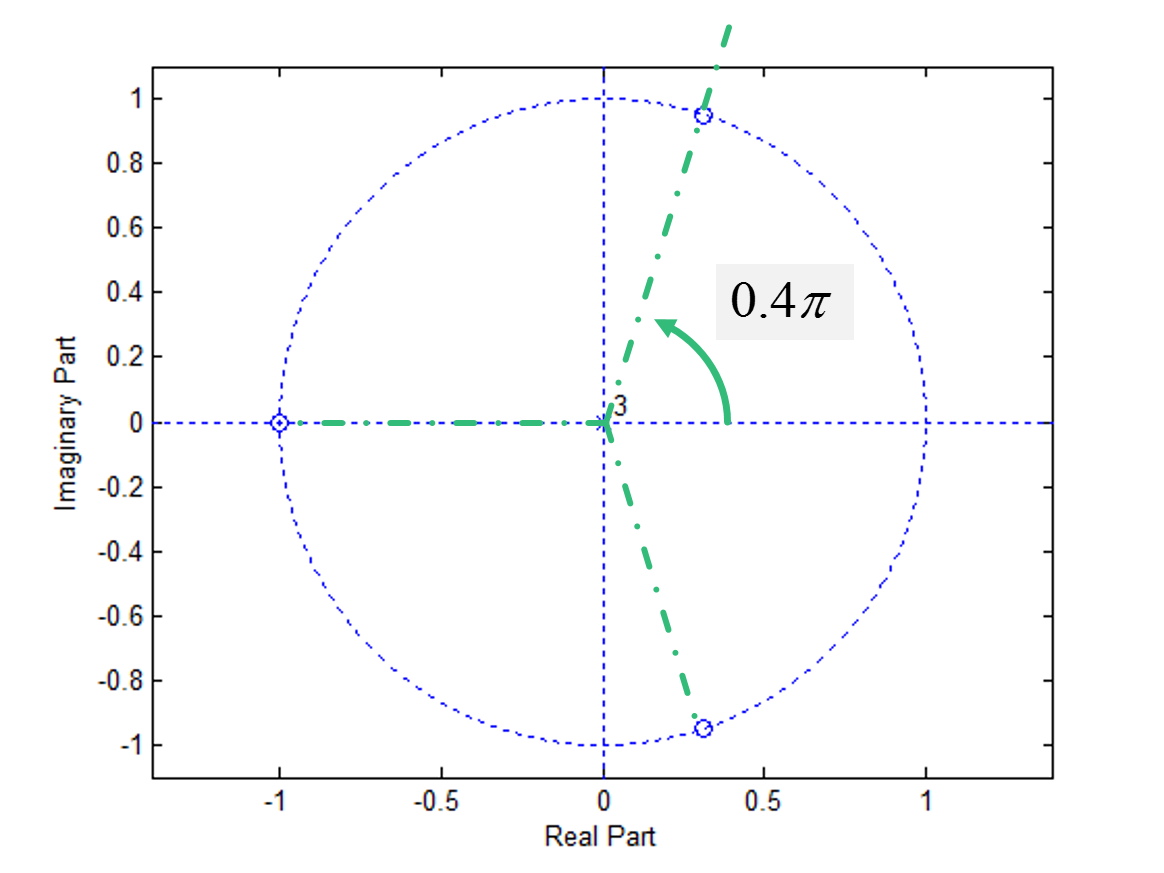

In [7]:
Image('.\Figs\EE0404_Lecture8_fig4.png',width=400)

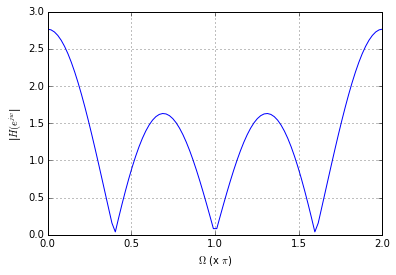

In [8]:
# Frequency Response: Complex Conjugate zeroes at 0.4 pi and at pi

w = linspace(0,2*pi,100)
H3 = ((1 - 2*cos(0.4*pi)*exp(-1j*w) + exp(- 1j*2*w))*(1+exp(-1j*w))) / exp(- 1j*3*w)

plot(w/pi, abs(H3))
xlabel('$\Omega$ (x $\pi$)')
ylabel('|$H(e^{jw}$|')
grid(True)

** *Impulse response with 3 zeroes* **

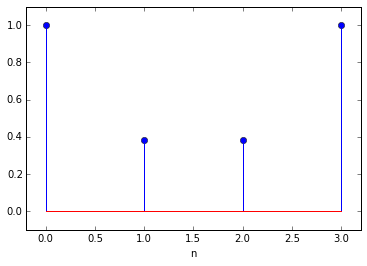

In [9]:
from scipy.signal import *
h2 = convolve([1, -2*cos(0.4*pi), 1],[1, 1])
n = [0,1,2,3]

stem(n,h2)
xlim([-.2, 3.2])
ylim([-0.1, 1.1])
xlabel('n')

# RESULTs on effects of ZEROES:

1) By adding zeros at a specific frequency, we obtain zero gain at that frequency.

2) We have to use conjugate symmetric zeros to obtain real coefficients.

3) We have to introduce delays to obtain a causal form of the filter. 

**This filter will always be F.I.R.**


# Effect of Poles on frequency response

## Example: Simplest Filter via poles

We want a filter that will have a large gain at 200 Hz. Calculate the transfer function if $f_s$= 2kHz.

- This time, we need only one pole.
- However, if the pole is located on unit circle, we obtain infinite gain due to division by 0.
- Thus, the pole should be close to (and inside of) unit circle.
- The argument of the pole should be at 200 Hz, one root at denumerator.


** *Solution* **

- We need only one pole at 200 Hz, one root at denumerator.

- The normalized angular frequency of pole point is
 $$ \Omega = 2\pi \frac{200} {f_s} = 0.2\pi $$

- The location of pole on z-plane may be:

$$ z = 0.95\ e^{\ j0.2\pi} $$


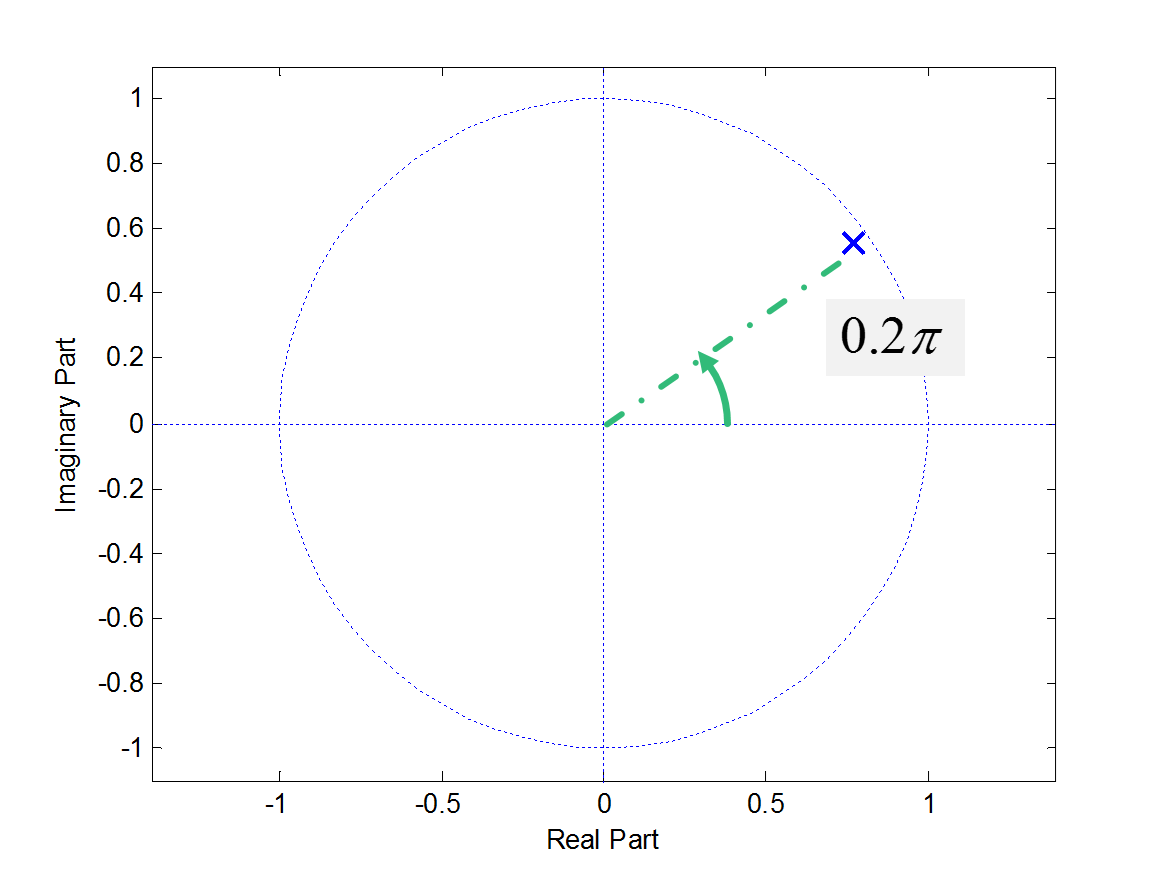

In [10]:
Image('.\Figs\EE0404_Lecture8_fig5.png',width=400)

 ** *Frequency Response for single pole* ** 
 
For the single pole, we have
 
 $$ H(z) =\frac {1} {z - 0.95\ e^{\ j0.2\pi}} $$
 
Now let the norm of the pole point be $r$ instead of 0.95. For this state,

$$ H(z) =\frac {1} {z - r \ e^{\ j0.2\pi}} $$

and the frequency response is

$$ H(e^{j\omega}) =\frac {1} {e^{j\omega} - r \ e^{\ j0.2\pi}} $$

For $\omega = 0.2\pi$,

$$ H(e^{j\ 0.2\pi}) = \frac {1} {e^{j\ 0.2\pi} - r \ e^{\ j0.2\pi}} $$

$$\                 = \frac {1} {e^{j\ 0.2\pi} (1 - r) } $$

and

$$ \left| H(e^{j\ 0.2\pi}) \right| = \frac {1} {|1-r\ |} $$


So this filter has a gain of $ 1/ (1-r) $ for $0.2\pi$ . That is, as pole gets closer to origin, the gain increases and approaches to infinity. For current state, where $r=0.95$, we have

$$ \left| H(e^{j\ 0.2\pi}) \right| = \frac {1} {|1-0.95\ |} = 20$$

What about other frequencies?

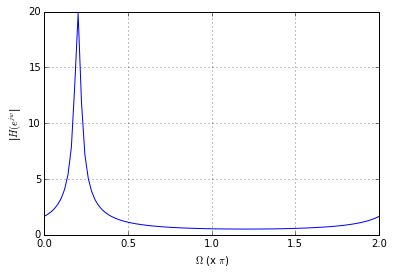

In [11]:
# Frequency Response for single pole at 0.2pi

w = linspace(0,2*pi,100)
H4 = 1 / (exp(1j*w) -  0.95*exp(1j*0.2*pi))

plot(w/pi, abs(H4))
xlabel('$\Omega$ (x $\pi$)')
ylabel('|$H(e^{jw}$|')
grid(True)

** Realizable? **

Consider this single-pole filter

 $$ H(z) = \frac {1} {z - 0.95\ e^{\ j0.2\pi}} $$
 
- Does it have real coefficients?

- Is it casual?

** *Solution* **

- Similar to one we obtained for single zero filter, the difference equation of single pole filter is 

$$ y(n+1) = x(n) + 0.95 e^{j0.2\pi}y(n) $$

which also has a complex coefficient and is non-causal.

** 1) Getting rid of non-causality **

From the difference equation

$$ Y(z)z = X(z) + 0.95\ e^{j0.2\pi} Y(z) $$

By multiplying both sides with $ z^{-1} $

$$ Y(z) = X(z)z^{-1} + 0.95\ e^{j0.2\pi} Y(z)z^{-1} $$

and back to difference equation

$$ y(n) = x(n-1) + 0.95 e^{j0.2\pi}y(n-1) $$

Also, one can easily transfrom $H(z)$ by

$$ H(z) = \frac {1} {z - 0.95\ e^{\ j0.2\pi}} \left( \frac{z^{-1}}{z^{-1}} \right) $$

$$ \    = \frac {z^{-1}} {1 - 0.95\ e^{\ j0.2\pi}z^{-1}} $$

and that yields to same causal difference equation obtained previously.

** 2) Getting rid of complex coefficient **

- Similar to one zero case, we need a second pole for which the frequency response stays untouched.

- So, in addition to point $ (0.95, 0.2\pi) $ in polar coordinates, we now add its conjugate pair $ (0.95, -0.2\pi)$ as the second pole

$$ H(z) = \left( \frac {z^{-1}} {1 - 0.95\ e^{\ j0.2\pi}z^{-1}} \right) \left( \frac {z^{-1}} {1 - 0.95\ e^{\ -j0.2\pi}z^{-1}} \right) $$
 
$$ H(z) = \frac {z^{-2}} {1 -1.9 cos(0.2\pi)z^{-1} + (0.95)^2z^{-2}} $$

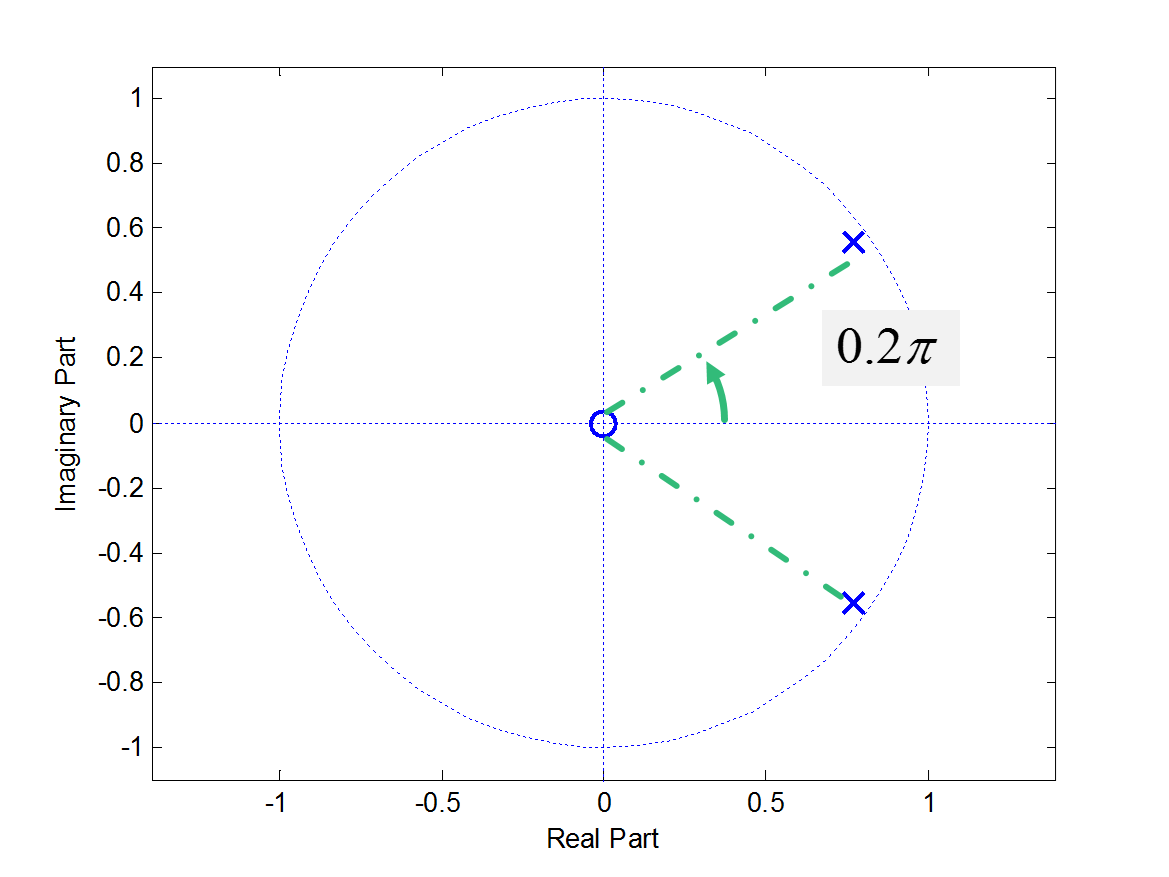

In [12]:
Image('.\Figs\EE0404_Lecture8_fig6.png',width=400)

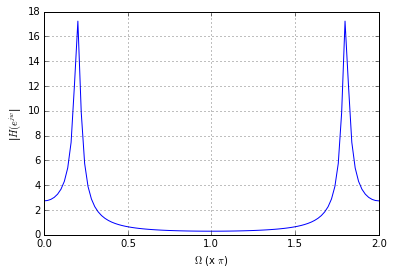

In [13]:
# Frequency Response for conjugate pole pair at +/- 0.2pi

w = linspace(0,2*pi,100)
H4 = 1 / ((exp(1j*w) -  0.95*exp(1j*0.2*pi))*(exp(1j*w) -  0.95*exp(-1j*0.2*pi)))

plot(w/pi, abs(H4))
xlabel('$\Omega$ (x $\pi$)')
ylabel('|$H(e^{jw}$|')
grid(True)

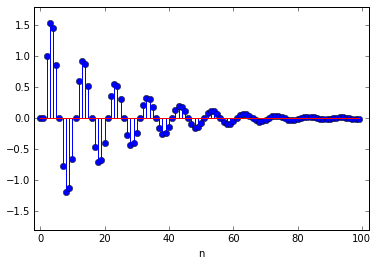

In [14]:
# Impulse response of conjugate pole pair function.
r = 0.95
phi = 0.2*pi

b = [0,0,1]
a = [1, -2*r*cos(phi), power(r,2)]

dirac = repeat(0.0,100)
dirac[0] = 1

h5 = lfilter(b,a,dirac)

stem(h5)
xlim([-2, 102])
ylim([-1.8, 1.8])
xlabel('n')

** *Effect of Pole distance to unit circle* ** 

Previously we derived that the gain at pole frequency depends on the pole's distance to origin by

$$ \left| H(e^{j\ \Omega_{pole}}) \right| = \frac {1} {|1-r\ |} $$

That is, the gain increases as pole gets closer to origin. Impulse response is also affected by pole distance. 

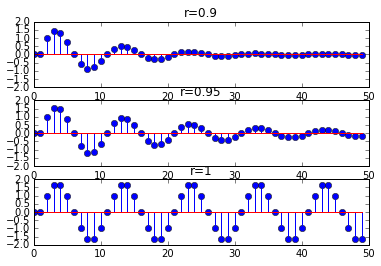

In [45]:
rs= [0.9 ,0.95, 1]
dirac = repeat(0.0,50)
dirac[0] = 1
n=1


for c in rs:
    phi = 0.2*pi
    r = c
    b2 = [0,0,1]
    a2 = [1, -2*r*cos(phi), power(r,2)]
    h6 = lfilter(b2,a2,dirac)
    subplot(3,1,n)
    stem(h6)
    ylim([-2,2])
    n=n+1
    title('r='+ str(c))
    
    

- As the figures reveal, when pole is located on unit circle ($r=1$), the system is in an oscillatory state. In continuous time systems, this state is obtained when the poles are located on $j\omega$ axis of $s-plane$. 


- As pole gets closer to origin, the decay term is increased without any change in oscillation frequency. In a similar comparison, in continuous time systems this change in impulse response can be observed if conjugate pole pairs move towards $- \inf$ on $s-plane$ with constant complex components.